# **Benjamin Freund**
# **Flights Project**

## *Introduction*

Millions of flights leave from airports across the world every day. All of these flights generate billions of data points that can be analyzed to improve the overall flight experience. In this analysis, a small subset of flights will be analyzed to answer some critical research questions. This is not a full analysis, but rather an introductory analysis with the goal of raising issues and leading to further analyses.

The theme of this analysis will be customer satisfaction. People often dread flying, whether it is due to waiting in line, airplane delays, or cancelled flights. Ideally, airlines would want to do whatever they can to minimize all of the negatives associated with flying and increase customer satisfaction. This analysis will identify specific problems that are potentially causing customer dissatisfaction.

## *Importing the Data*

This data is originally from the US' Buerau of Transportation. It is a 20,000 row subset of the hflights package in R. It provides data about domestic flights departing from two airports in Houston, Texas (IAH and HOU) throughout 2011.

The code below uses the pandas package in Python to import this data into the Python environment.

In [6]:
# Importing the Pandas package into Python
import pandas as pd

# Accessing the csv that contains the data and storing it in filename
filename = 'https://raw.githubusercontent.com/jtopor/DAV-5400/master/Project1/hflights.csv'

# Reading that csv into the variable hflights
hflights = pd.read_csv(filename)

# Print hflights
print(hflights)

       Year  Month  DayofMonth  DayOfWeek  DepTime  ArrTime UniqueCarrier  \
0      2011      1           1          6   1400.0   1500.0            AA   
1      2011      1           2          7   1401.0   1501.0            AA   
2      2011      1           3          1   1352.0   1502.0            AA   
3      2011      1           4          2   1403.0   1513.0            AA   
4      2011      1           5          3   1405.0   1507.0            AA   
...     ...    ...         ...        ...      ...      ...           ...   
19995  2011      2          25          5   1126.0   1333.0            CO   
19996  2011      2          25          5    941.0   1111.0            CO   
19997  2011      2          25          5    722.0    948.0            CO   
19998  2011      2          25          5   1909.0   2216.0            CO   
19999  2011      2          25          5   1255.0   1553.0            CO   

       FlightNum TailNum  ActualElapsedTime  ...  ArrDelay  DepDelay  Origi

## *Research Questions*

There are a countless number of fascinating analytical questions one can ask based on this database. Listed below are three questions, along with an explanation of the validity of the questions as they relate to customer satisfaction.

### How many flights have longer taxiing times than expected?

If there's one thing passengers dread more than waiting in the airport, it is waiting on the plane. It's understandable that some taxiing is necessary. However, an unnecessarily lengthened taxiing time can cause customer dissatisfaction. An analysis that identifies the number of flights with longer taxiing times can help carriers identify problem airports. Once identified, problem airports can then work on decreasing their taxiing time, which will, in turn, increase customer satisfaction.

### What are the average arrival and departure delays at each airport?

IAH and HOU are two major airports that constantly have arriving and departing flights. All of these flights can lead to increased air traffic, which, along with other factors, can cause delays. It would be interesting to compare delays at IAH and HOU to see if the delays at one airport are significantly longer than the other. If they are, further analysis can be done to determine the causes behind increased delays and action can be taken to minimize them.

### Are flights travelling to certain destinations more or less likely to be cancelled or diverted?

Many people, from staff to passengers, are inconvenienced when flights are cancelled or diverted. Minimizing these instances helps everyone feel a sense of security with their flights. If certain destinations are more or less prone to these instances than others, they can be pinpointed as problem destinations. Further analyses can then be done to determine the causes behind the cancellations and diversions and to minimize their occurence. 

## *Simplifying the Data*

As can be seen from the above printed output of hflights, there are 20 different variables in this dataset (the first variable is simply the index number). Not all of this data is necessary in order to properly answer the research questions outlined above. Therefore, it is proper to transform this dataset into a more usable format.

### Taxiing Times

For the first question, the TaxiIn and TaxiOut variables are essential to help determine the total taxiing time.

For clarity's sake, a new dataframe will be created that will only have the aforementioned variables. These variables will be stored in the dataframe called taxi_hflights.

In [54]:
# Create dataframe only containing rows necessary to answer research question and store in taxi_hflights
taxi_hflights = pd.DataFrame(hflights[['TaxiIn', 'TaxiOut']])

# Print taxi_hflights
print(taxi_hflights)

       TaxiIn  TaxiOut
0         7.0     13.0
1         6.0      9.0
2         5.0     17.0
3         9.0     22.0
4         9.0      9.0
...       ...      ...
19995     5.0     30.0
19996     5.0     12.0
19997    17.0     14.0
19998     6.0     15.0
19999    13.0     22.0

[20000 rows x 2 columns]


### Delays

For the second question, the ArrDelay, DepDelay, and Origin variables are necessary to determine the average delays at each airport.

Again, for clarity's sake, a new dataframe will be created that will only contain the aforementioned variables. This dataframe will be called delay_hflights.

In [75]:
# Create dataframe only containing rows necessary to answer research question and store in delay_hflights
delay_hflights = pd.DataFrame(hflights[['ArrDelay', 'DepDelay', 'Origin']])

# Print delay_hflights
print(delay_hflights)

       ArrDelay  DepDelay Origin
0         -10.0       0.0    IAH
1          -9.0       1.0    IAH
2          -8.0      -8.0    IAH
3           3.0       3.0    IAH
4          -3.0       5.0    IAH
...         ...       ...    ...
19995       8.0      -4.0    IAH
19996       0.0      11.0    IAH
19997     -17.0      -3.0    IAH
19998     -10.0      12.0    IAH
19999      -3.0       5.0    IAH

[20000 rows x 3 columns]


### Cancellations and Diversions

For the third question, the necessary variables are Dest, Cancelled, and Diverted. These variables will help determine which flights are cancelled / diverted, what their destination is, and how frequently these instances occur.

Once again, for clarity's sake, a new dataframe will be created that will only contain these three variables. This dataframe will be called cd_hflights.

In [13]:
# Create dataframe only containing rows necessary to answer research question and store in cd_hflights
cd_hflights = pd.DataFrame(hflights[['Dest', 'Cancelled', 'Diverted']])

# Print cd_hflights
print(cd_hflights)

      Dest  Cancelled  Diverted
0      DFW          0         0
1      DFW          0         0
2      DFW          0         0
3      DFW          0         0
4      DFW          0         0
...    ...        ...       ...
19995  MTJ          0         0
19996  ONT          0         0
19997  ORD          0         0
19998  FLL          0         0
19999  ATL          0         0

[20000 rows x 3 columns]


## *Analyzing the Data*

The next step is to analyze each dataframe in the context of its respective research question.

### Taxiing Times

The first research question tackles the issue of taxiing times. In order to calculate which flights have unneccesarily long taxiing times, the mean and standard deviation need to be determined. These statistics are outlined below.

In [55]:
# MEAN TAXI IN
# Calculating the mean time it takes for a plane to taxi in and storing it in mean_taxi_in
mean_taxi_in = taxi_hflights['TaxiIn'].describe()['mean']

# Printing mean_taxi_in in sentence form
print('The mean taxi in time is', mean_taxi_in, 'minutes.')

# Printing a blank line in between the previous sentence and the next sentence
print('')



# STD TAXI IN
# Calculating the standard deviation of the time it takes for a plane to taxi in and storing it in std_taxi_in
std_taxi_in = taxi_hflights['TaxiIn'].describe()['std']

# Printing std_taxi_in in sentence form
print('The standard deviation of taxi in time is', std_taxi_in, 'minutes.')
print('')



# MEAN TAXI OUT
# Calculating the mean time it takes for a plane to taxi out and storing it in mean_taxi_out
mean_taxi_out = taxi_hflights['TaxiOut'].describe()['mean']

# Printing mean_taxi_out in sentence form
print('The mean taxi out time is', mean_taxi_out, 'minutes.')
print('')



# STD TAXI OUT
# Calculating the standard deviation of the time it takes for a plane to taxi out and storing it in std_taxi_out
std_taxi_out = taxi_hflights['TaxiOut'].describe()['std']

# Printing std_taxi_out in sentence form
print('The standard deviation of taxi out time is', std_taxi_out, 'minutes.')

The mean taxi in time is 6.076545583324902 minutes.

The standard deviation of taxi in time is 4.0857318168538965 minutes.

The mean taxi out time is 15.13432760364004 minutes.

The standard deviation of taxi out time is 7.046055836736106 minutes.


It is generally accepted that outliers fall outside of two standard deviations of the mean. Therefore, two standard deviations should be added to each mean value.

In [56]:
# TAXIING IN
# Adding two standard deviations to the mean time it takes to taxi in and storing it in longest_taxi_in
longest_taxi_in = mean_taxi_in + std_taxi_in + std_taxi_in

# Printing longest_taxi_in in sentence form
print('The longest expected taxiing in time is', longest_taxi_in, 'minutes.')
print('')


# TAXIING OUT
# Adding two standard deviations to the mean time it take to taxi out and storing it in longest_taxi_out
longest_taxi_out = mean_taxi_out + std_taxi_out + std_taxi_out

# Printing longest_taxi_out in sentence form
print('The longest expected taxiing out time is', longest_taxi_out, 'minutes.')

The longest expected taxiing in time is 14.248009217032696 minutes.

The longest expected taxiing out time is 29.226439277112252 minutes.


Now, the flights which took longer than the above expected taxiing times to taxi in and out will be sliced from the taxi_hflights dataframe.

In [60]:
# Slicing the taxi_hflights dataframe to find all occurances of longer than expected taxiing times and storing it in longest_taxi
longest_taxi = taxi_hflights[(taxi_hflights.TaxiIn > longest_taxi_in) | (taxi_hflights.TaxiOut > longest_taxi_out)]

# Printing longest_taxi
print(longest_taxi)
print('')


# Calculating the amount of observations in longest_taxi and storing it in longest_taxi_size
longest_taxi_size = longest_taxi.size / 2

# Printing longest_taxi_size in sentence form
print('There are', int(longest_taxi_size), 'flights that are above either the expected taxiing in time or the expected taxiing out time.')
print('')


# Calculating the percentage of flights that have a longer than expected taxiing time and storing it in longest_taxi_percent
longest_taxi_percent = (longest_taxi_size / taxi_hflights.size) * 100

# Printing longest_taxi_percent in sentence form
print('This is', longest_taxi_percent, '% of all the given flights.')

       TaxiIn  TaxiOut
33       21.0     10.0
37       24.0     10.0
43       16.0     14.0
44       15.0     11.0
52       18.0      7.0
...       ...      ...
19969     6.0     30.0
19980     5.0     31.0
19982    22.0     13.0
19995     5.0     30.0
19997    17.0     14.0

[1322 rows x 2 columns]

There are 1322 flights that are above either the expected taxiing in time or the expected taxiing out time.

This is 3.305 % of all the given flights.


Only 3.305% of the flights in our data set taxi for longer than we would expect them to.

### Delays

The second research question discusses arrival and departure delays. The goal is to calculate the average delays at each airport and to see if one airport is worse than the other.

Calculating the mean is the best way to determine the average delays.

In [85]:
# IAH ARRIVALS
# Creating a dataframe from the delay_hflights dataframe where all flights have an origin of IAH and storing it in d_iah_hflights
d_iah_hflights = delay_hflights[(delay_hflights['Origin'] == 'IAH')]

# Printing the average arrival delay in sentence form
print('The average arrival delay from IAH was', d_iaharrival_hflights['ArrDelay'].describe()['mean'], 'minutes.')
print('')


# IAH DEPARTURES
# Printing the average departure delay in sentence form
print('The average departure delay from IAH was', d_iah_hflights['DepDelay'].describe()['mean'], 'minutes.')
print('')


# HOU ARRIVALS
# Creating a dataframe from the delay_hflights dataframe where all flights have an origin of HOU and storing it in d_hou_hflights
d_hou_hflights = delay_hflights[(delay_hflights['Origin'] == 'HOU')]

# Printing the average arrival delays in sentence form
print('The average arrival delay from HOU was', d_hou_hflights['ArrDelay'].describe()['mean'], 'minutes.')
print('')


# HOU DEPARTURES
# Printing the average departure delays in sentence form
print('The average departure delay from HOU was', d_hou_hflights['DepDelay'].describe()['mean'], 'minutes.')

The average arrival delay from IAH was 4.389104053705138 minutes.

The average departure delay from IAH was 6.886757226549926 minutes.

The average arrival delay from HOU was 8.183466792275082 minutes.

The average departure delay from HOU was 13.452022577610537 minutes.


As we can observe, HOU's average arrival delay time and average deparature delay time are about double those of IAH.

### Cancellations and Diversions

The third research question is trying to determine which flights are more or less likely to be cancelled or diverted based on their destination. In the cd_hflights dataframe, a 1 in the "Cancelled" column means that the flight was cancelled, while a 0 in that column means it wasn't cancelled. Similary, a 1 in the "Diverted" column means that the flight was diverted, while a 0 in that column means it wasn't diverted.

First, destinations and the frequency of which they have cancelled flights are shown below.

In [99]:
# Finding all the observations in cd_hflights where the flight is cancelled and storing it in cancelled_hflights
cancelled_hflights = cd_hflights[(cd_hflights['Cancelled'] == 1)]

# Calculating the frequency of each destination in cancelled_hflights and storing it in cancelled
cancelled = cancelled_hflights['Dest'].value_counts()

# Printing cancelled
print(cancelled)

ATL    41
DAL    25
DFW    20
CLT    14
EWR    13
LGA    11
DCA     8
JFK     6
BOS     5
TUL     5
IAD     5
JAN     5
MEM     4
OKC     4
BHM     4
PHL     4
ICT     3
BWI     3
DTW     3
LIT     3
STL     3
ORD     3
IND     2
GSP     2
PNS     2
ASE     2
BRO     2
HRL     2
MSY     2
LFT     2
MOB     1
MCO     1
HNL     1
PHX     1
JAX     1
LCH     1
HSV     1
MIA     1
TUS     1
BTR     1
AVL     1
MFE     1
CVG     1
LBB     1
XNA     1
RDU     1
Name: Dest, dtype: int64


The graph below illustrates the frequency of the cancelled flights.

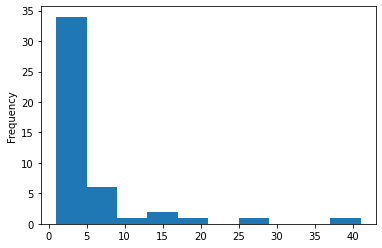

In [103]:
# Creating a histogram of cancelled frequency
cancelled.plot(kind = 'hist')

The graph above illustrates the cancellation frequency for each destination. The x axis is the number of cancellations, and the y axis is how often that number of cancellations happens.

As shown above by the code and the graph, ATL (Hartsfield-Jackson Atlanta International Airport) as a destination has the most cancellations (41), followed by DAL (Dallas Love Field Airport) (25) and DFW (Dallas / Fort Worth International Airport) (20). It is interesting to note that two of these airports are in Texas itself (just like the origin airports), while the third is in a nearby southern state.

Next, all of the diverted flights and their destinations are shown below.

In [101]:
# Finding all the observations in cd_hflights where the flight is diverted and storing it in diverted_hflights
diverted_hflights = cd_hflights[(cd_hflights['Diverted'] == 1)]

# Printing the frequency of each destination in diverted_hflights
diverted_hflights['Dest'].value_counts()

MCI    2
CLT    2
MIA    2
MKE    2
ASE    2
MSY    2
TUL    1
VPS    1
PDX    1
EWR    1
SEA    1
ECP    1
GSP    1
GUC    1
BTR    1
PHX    1
ABQ    1
BRO    1
HRL    1
HNL    1
DAY    1
SAN    1
HDN    1
DTW    1
PNS    1
AUS    1
SAV    1
SLC    1
LGA    1
PIT    1
LAX    1
JFK    1
Name: Dest, dtype: int64

As can be seen above, all destinations have roughly the same amount of diversions. Therefore, it's hard to identify an airport as being more diversion prone than another.

So, flights travelling to ATL, DAL, and DFW seem to be more prone to cancellations than other airport destinations, but no airport seems to be more prone to diversions.

## *Answering with Data*

Now, with the above analyses, the original research questions can be answered.

### Taxiing Times

1,322 flights, or 3.305% of the flights in the dataset, have a taxiing time that is two standard deviations or more longer than the average taxiing time. 3.305% is not significant enough to claim that either IAH or HOU are problem airports. Rather, it would seem that both airports do a fairly good job at taxiing.

### Delays

Flights from HOU end up being delayed both on arrival and on departure for about twice as long as flights from IAH do. Further analyses need to be done to determine why the delays at HOU are significantly longer and how they can be minimized. This analysis simply identifies the problem.

### Cancellations and Diversions

In terms of cancellations, certain destination airports (such as ATL, DAL, and DFW) tend to have more cancellations than others. Further analyses need to be done to determine why these destinations are having more cancellations and how these cancellations can be minimized. This analysis simply identifies the problem.

In terms of diversions, there does not seem to be a destination airport that is more prone to diversions than the others. Most airports only have one diversion recorded, while some have two. Therefore, diversions should not be a problem that airlines focus on.

## *Conclusion*

There are many problems that can tax airlines and their passengers. This analysis has identified delays at HOU and cancellations on flights heading to ATL, DAL, DFW, and others as problems airlines should tackle. Working on these problems could help increase customer trust and satisfaction. However, this analysis was done simply to identify the problems. Further analyses must be done to identify the causes behind the suggested problems and to locate more issues.

It is also necessary to spell out the limitations of this analysis. This analysis was done on a small subset of 20,000 domestic flights departing from IAH and HOU from January 01, 2011 to February 25, 2011. It by no means covered all airports, all time periods, or all flights. Again, further analyses must be done to acheive a full picture and a broader understanding.